# 그외 기타 스포츠시설 운영업

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
######################한글문제해결#########################
%matplotlib inline
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name =font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unkown Sytem....Sorry')
#########################################################

In [4]:
data = pd.read_csv('std_data/그외 기타 스포츠시설 운영업.csv', index_col=0, parse_dates=['REG_YYMM'])

In [5]:
def grap_year(data):
     data = str(data)
     return int(data[:4])

def grap_month(data):
     data = str(data)
     return int(data[4:])

In [6]:
data = data.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))

In [7]:
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)

columns = ['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)

# 연도 월별 AMT 

[Text(0, 0.5, 'AMT'), Text(0.5, 1.0, '그외 기타 스포츠시설 운영업 년월별 AMT')]

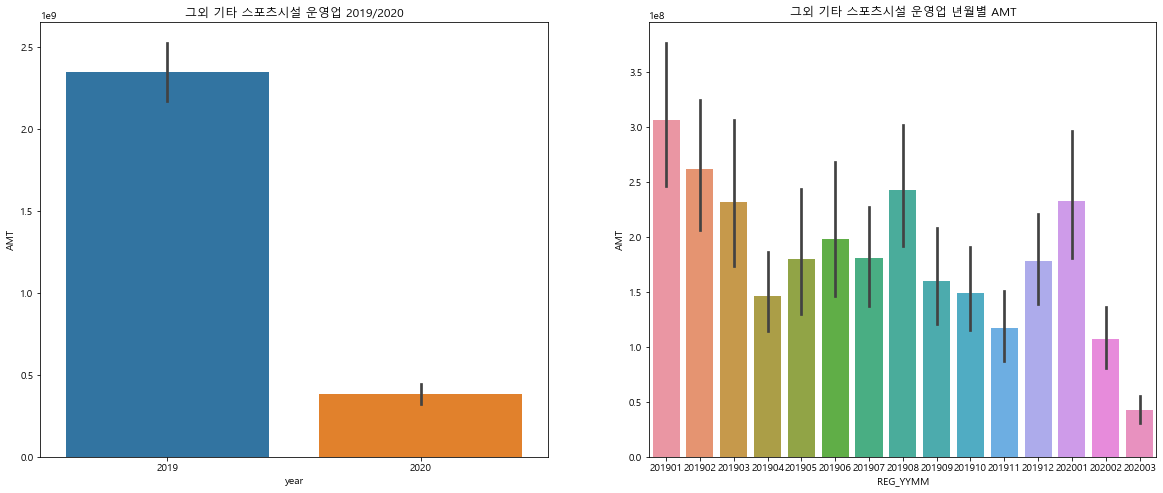

In [8]:
figure, (ax1, ax2)=plt.subplots(ncols=2)
#6개의 axes로 구성된 figure 생성
figure.set_size_inches(20, 8)
sns.barplot(data = df, x ='year', y='AMT', ax = ax1, estimator = sum)
sns.barplot(data = df, x ='REG_YYMM', y='AMT', ax = ax2, estimator = sum)

ax1.set(ylabel = 'AMT', title = '그외 기타 스포츠시설 운영업 2019/2020')
ax2.set(ylabel = 'AMT', title = '그외 기타 스포츠시설 운영업 년월별 AMT')

# 각 피쳐 벌 AMT

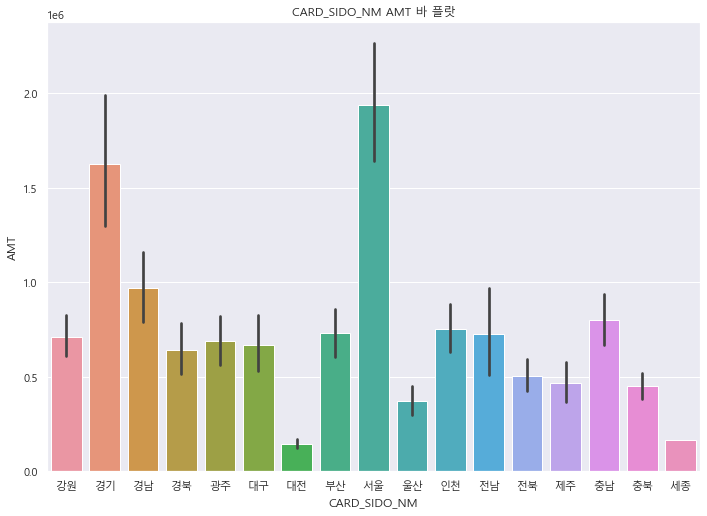

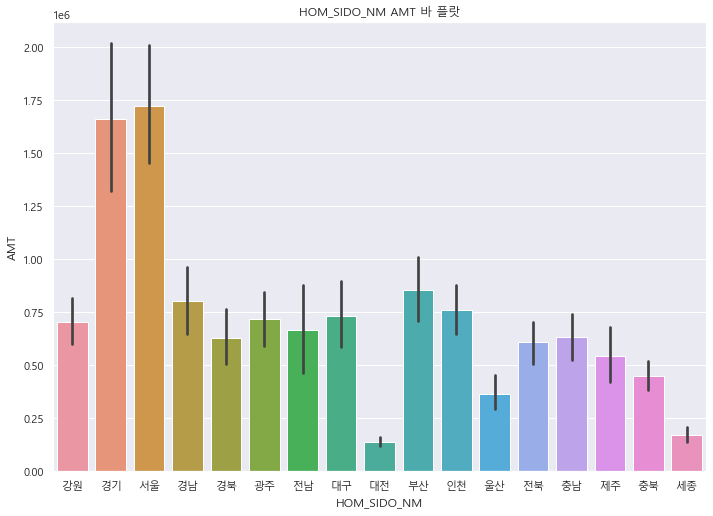

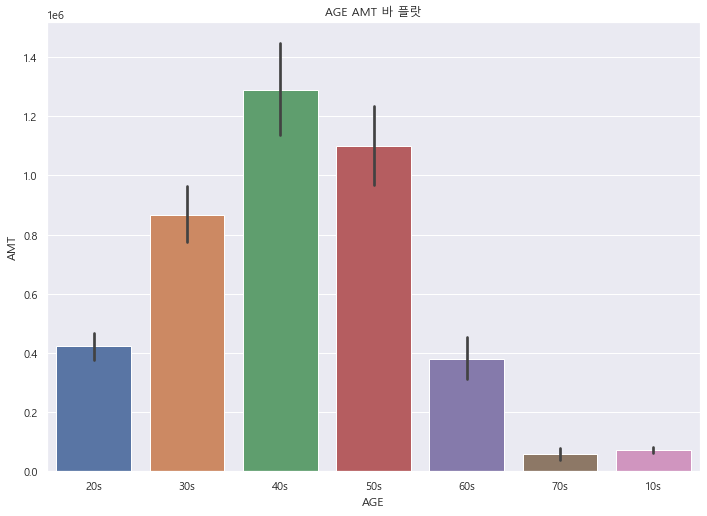

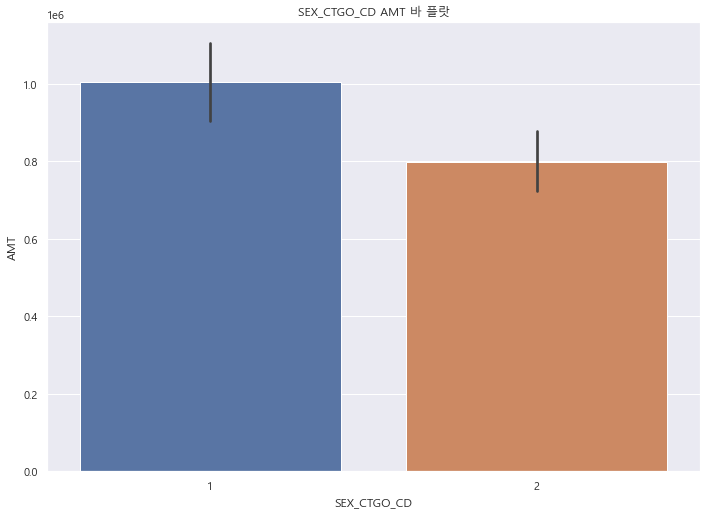

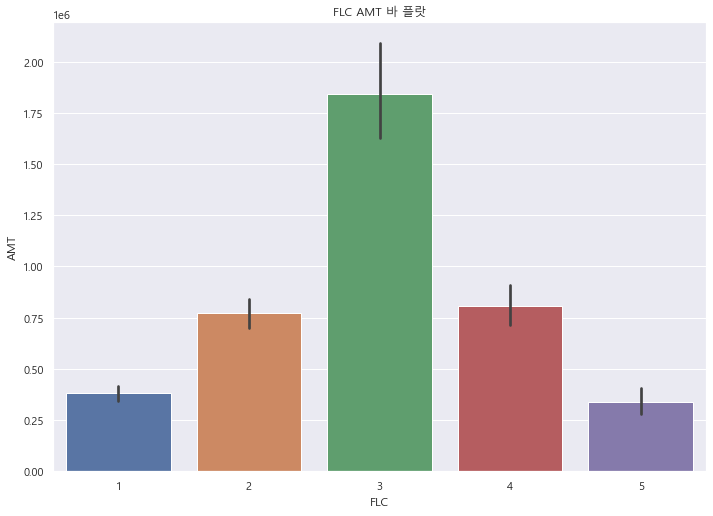

In [12]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v')
    plt.title(val +' AMT 바 플랏')
    plt.show()

# 사용지역 월별  AMT

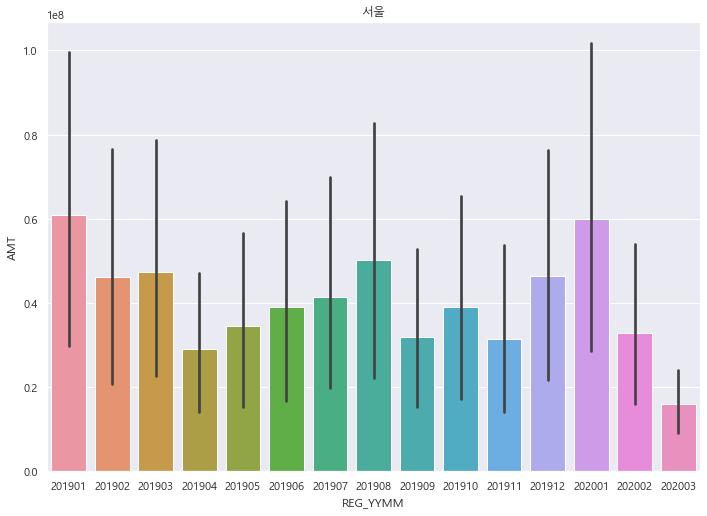

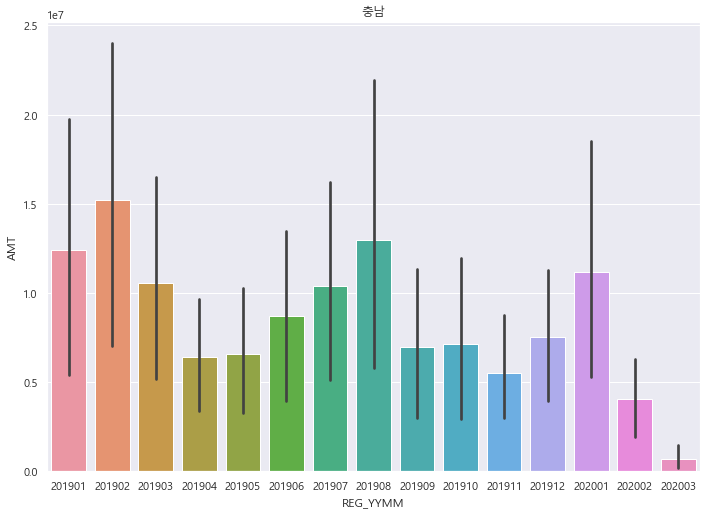

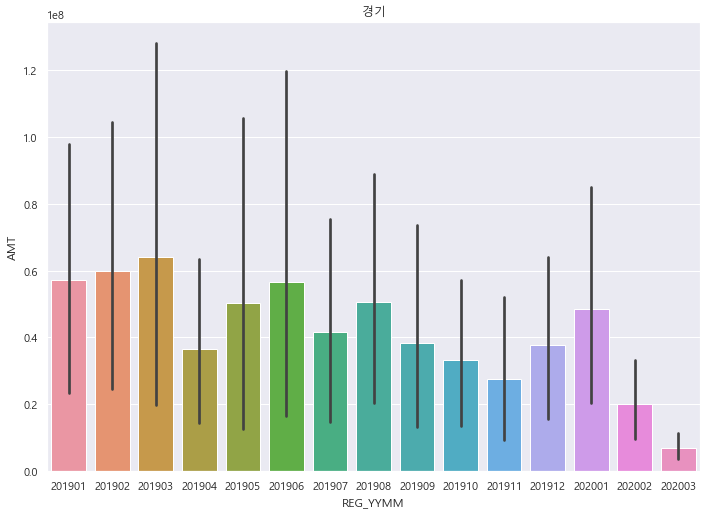

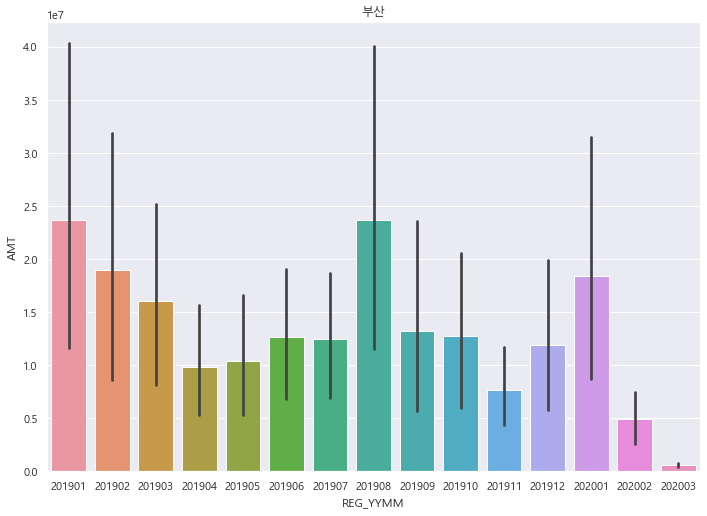

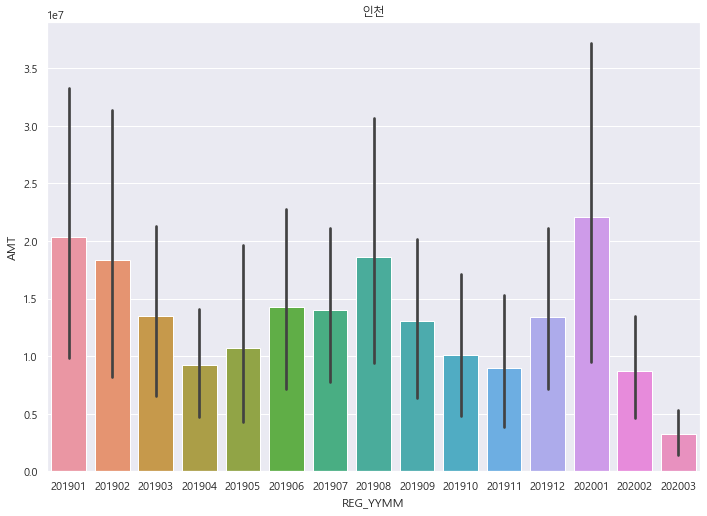

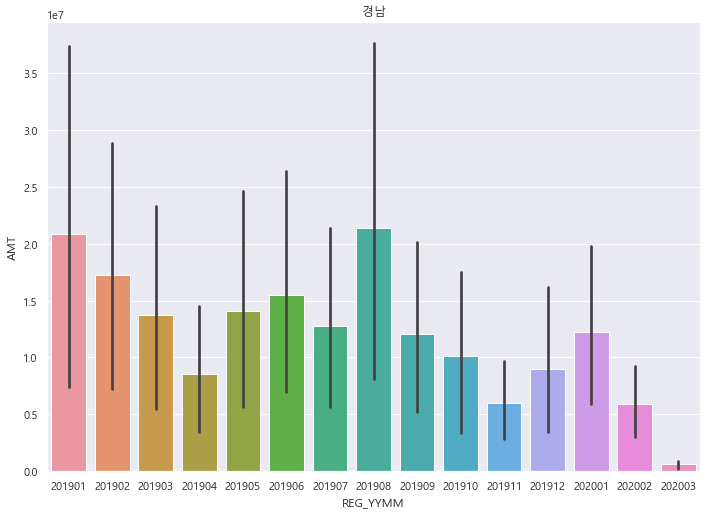

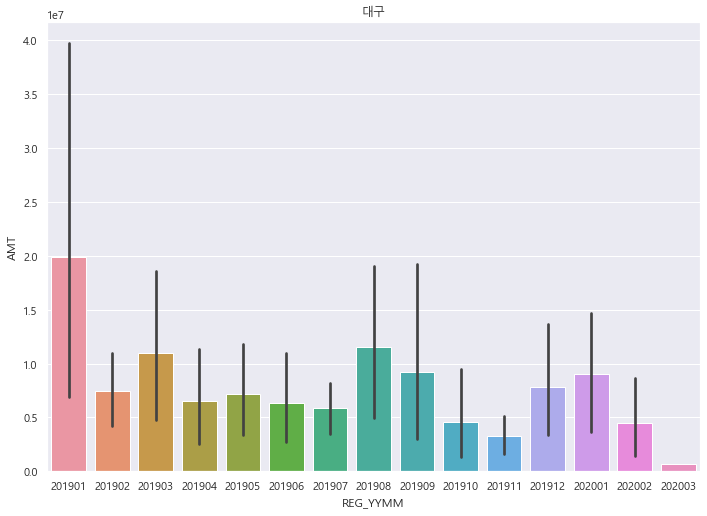

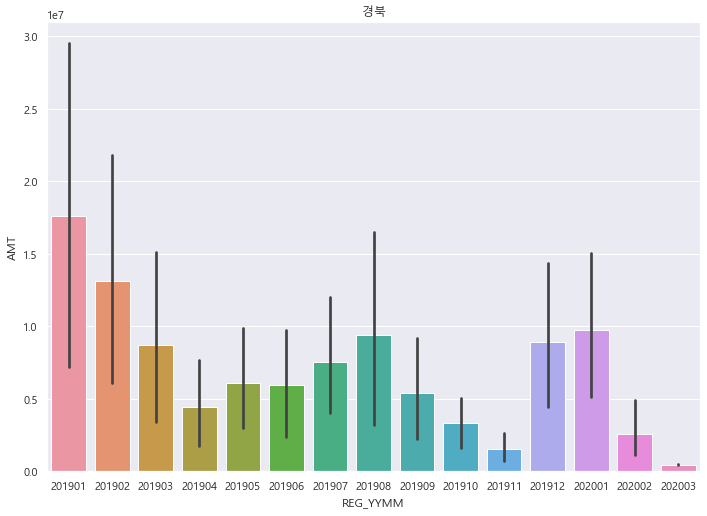

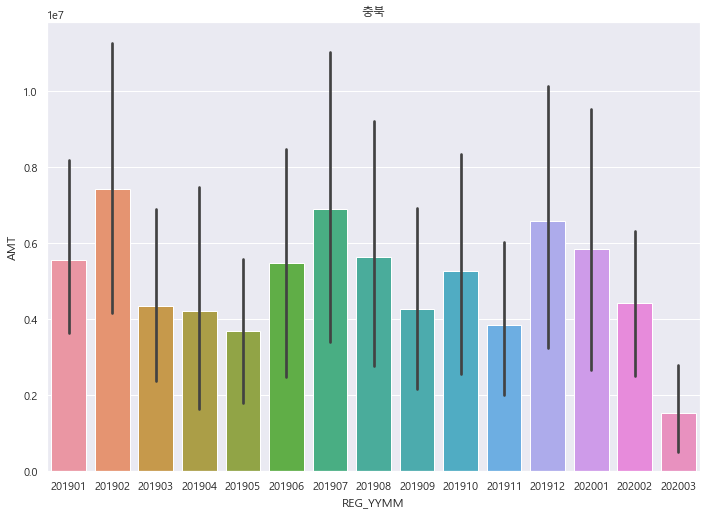

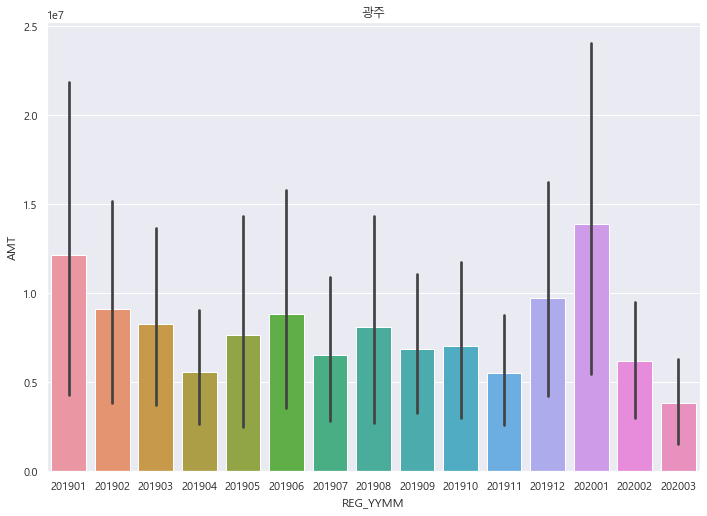

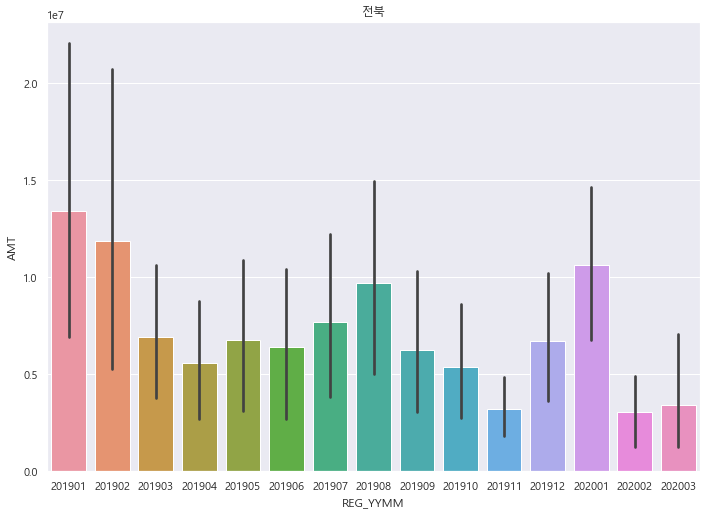

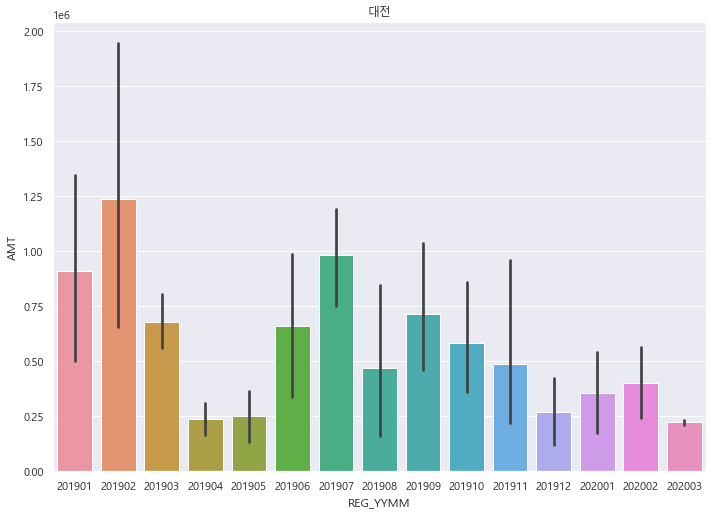

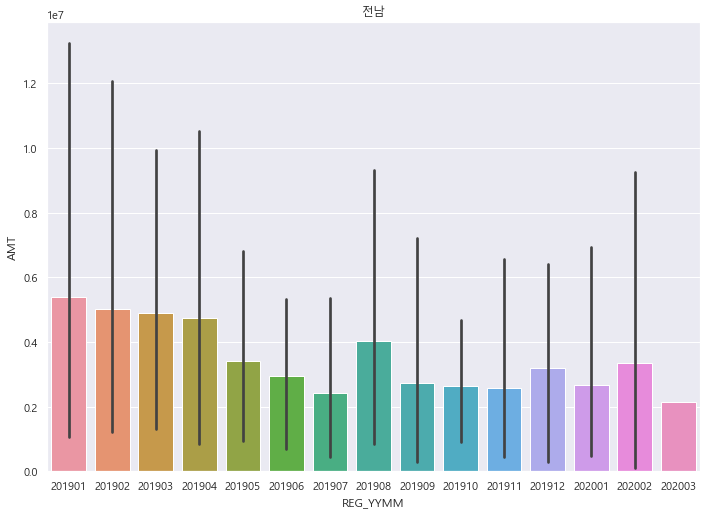

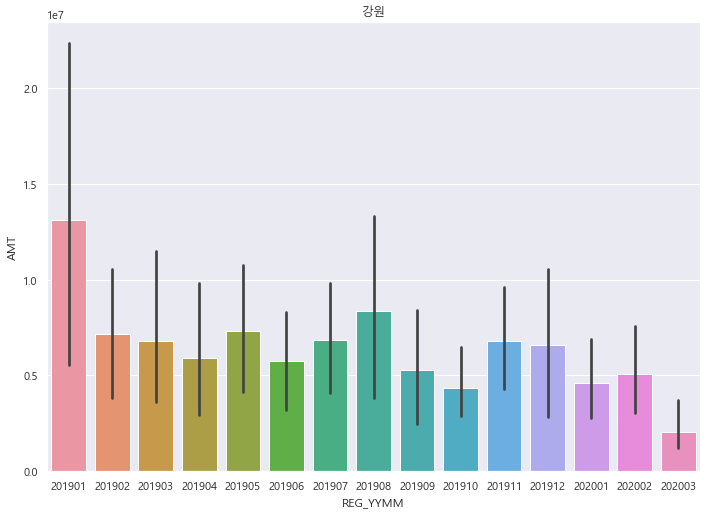

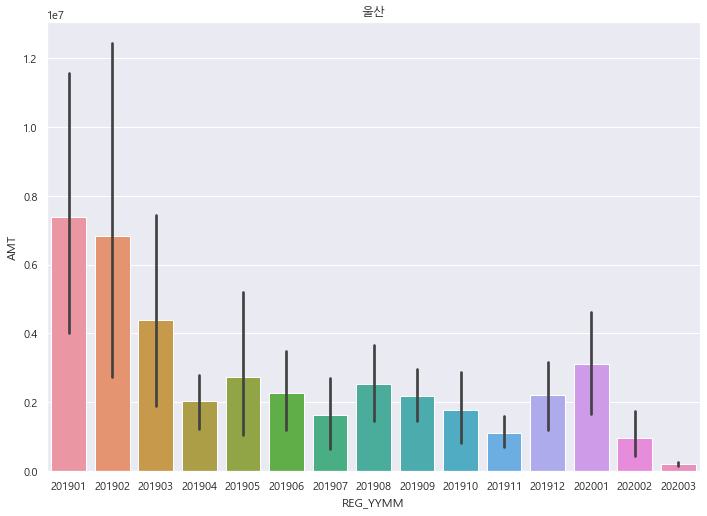

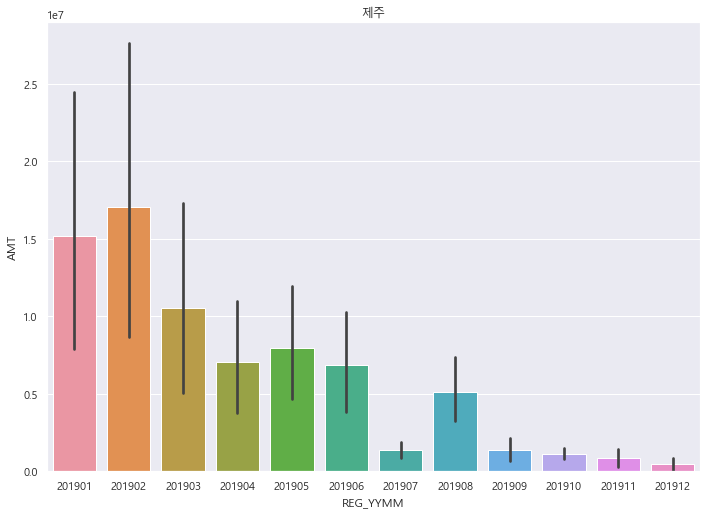

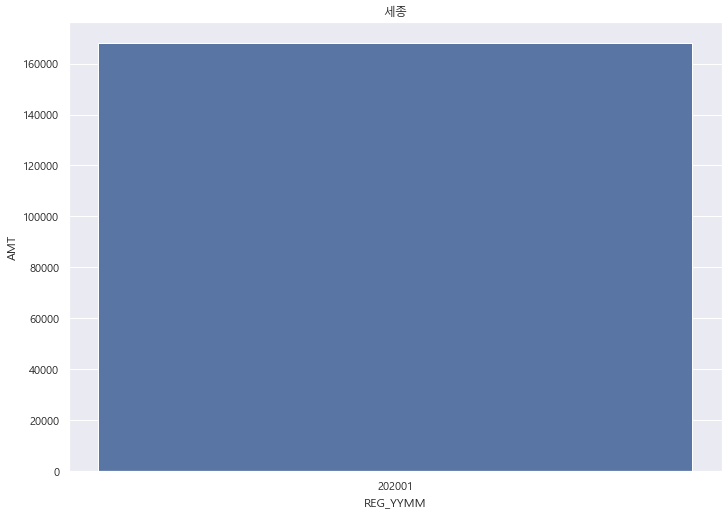

In [10]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    

# fig, axes = plt.subplots()
# fig.set_size_inches(18, 25)
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'REG_YYMM', y = 'AMT',  estimator = sum)
    plt.title(val)
    plt.show()

# 사용지역 - 거주지역 별 AMT 

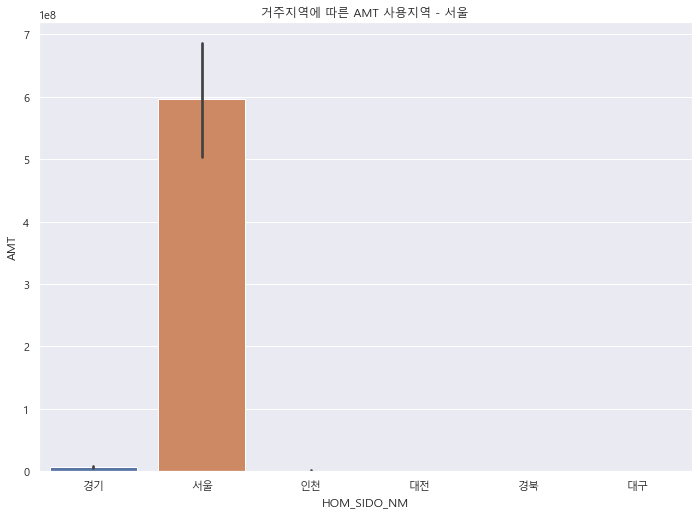

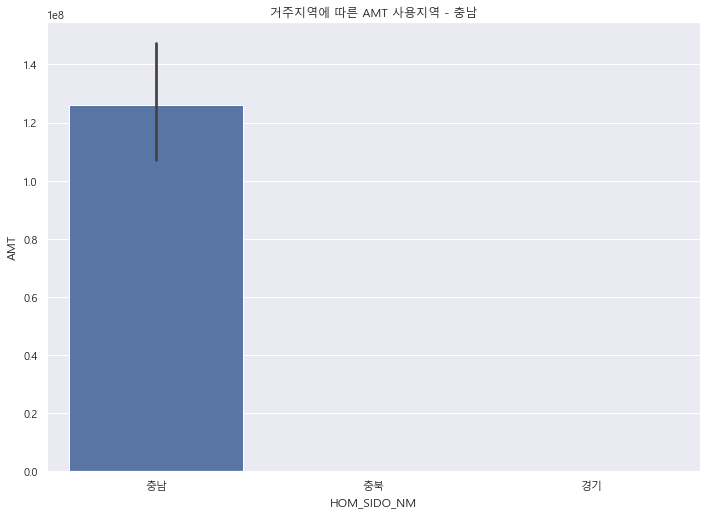

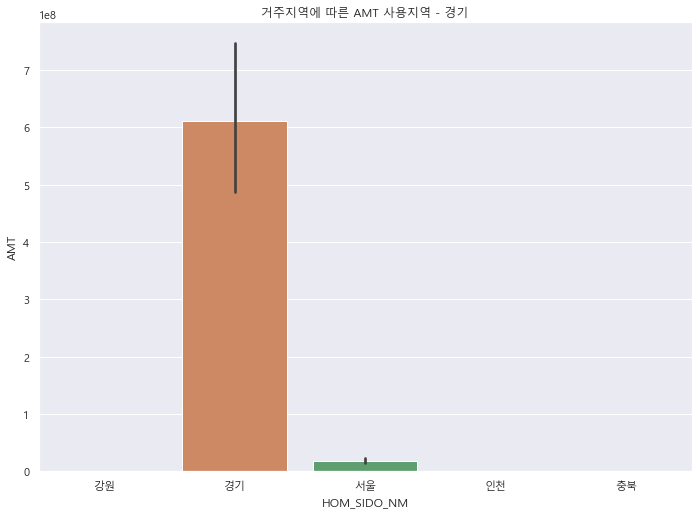

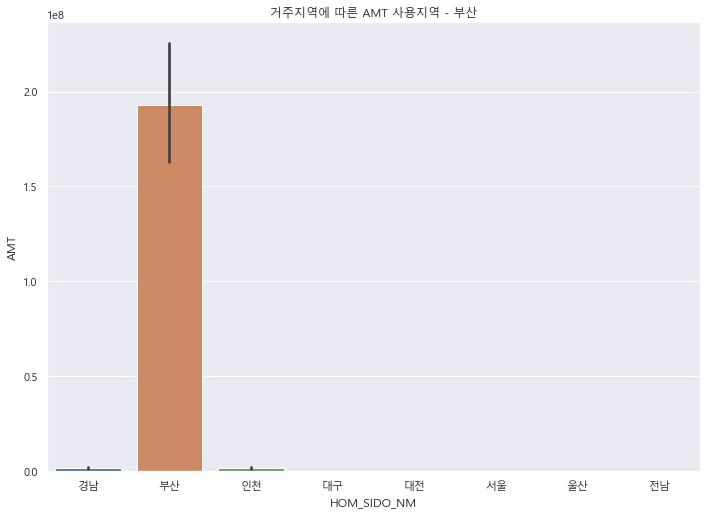

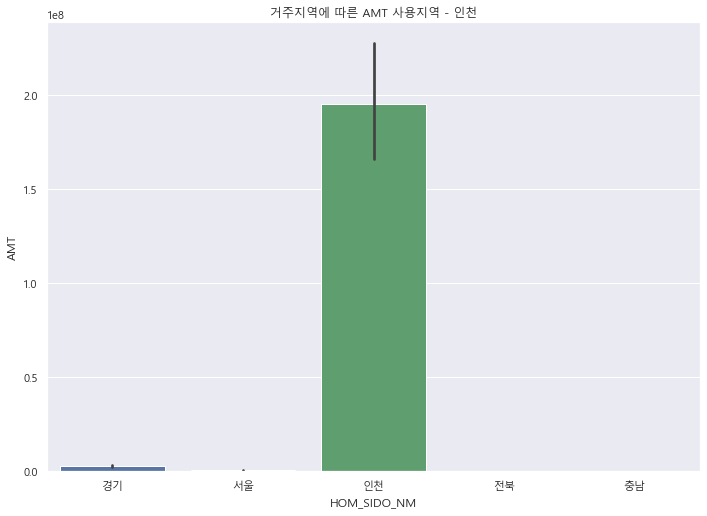

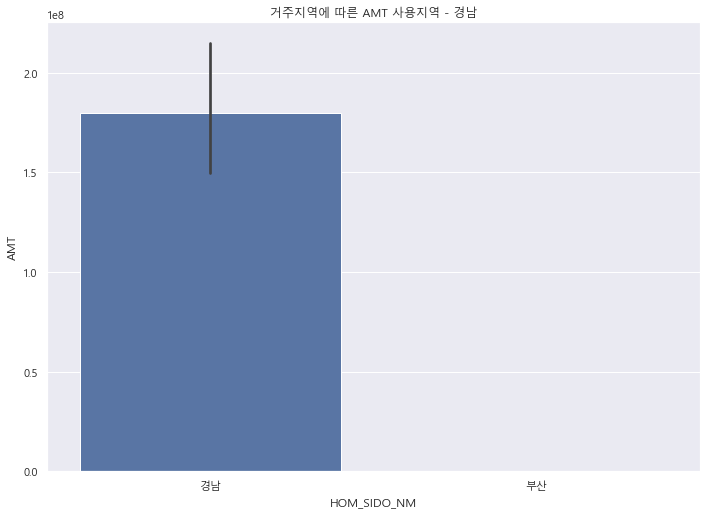

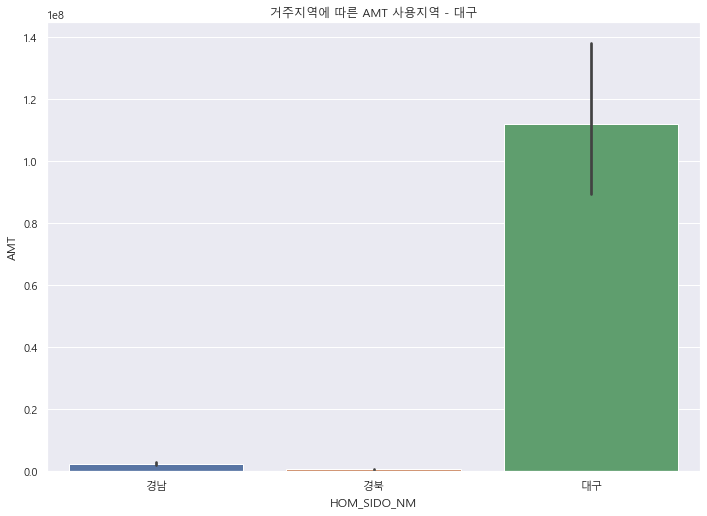

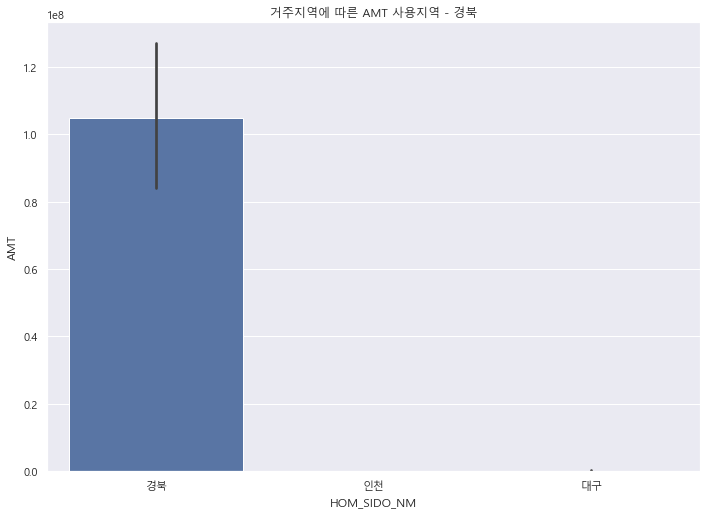

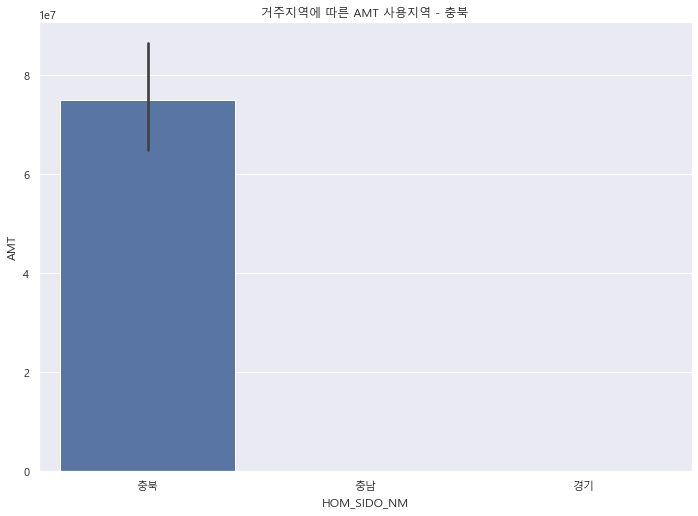

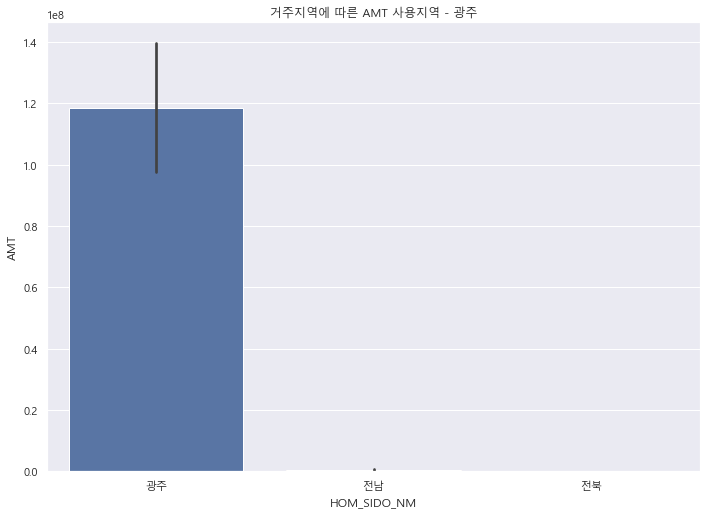

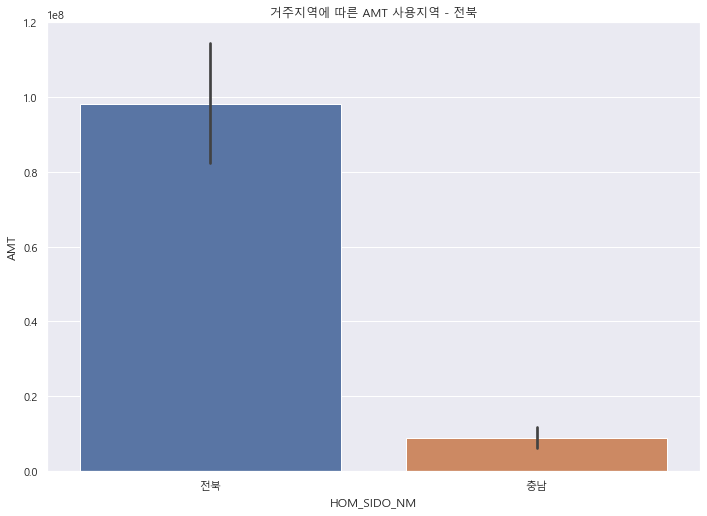

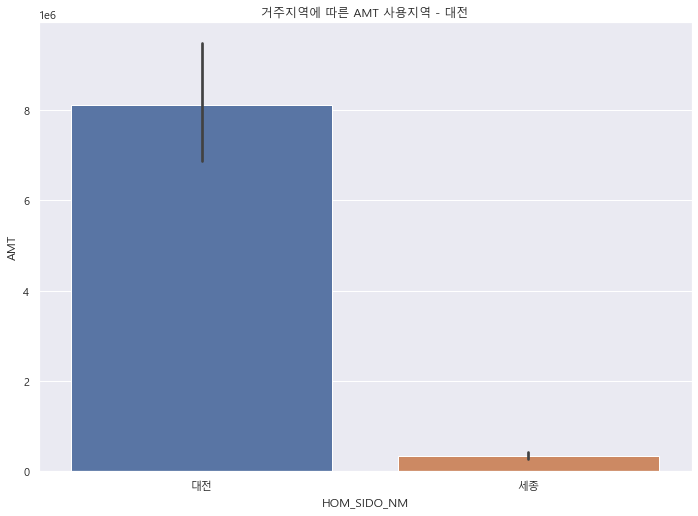

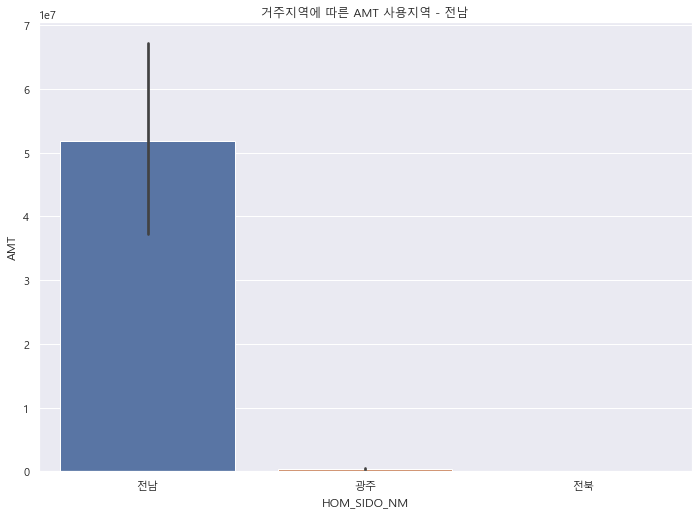

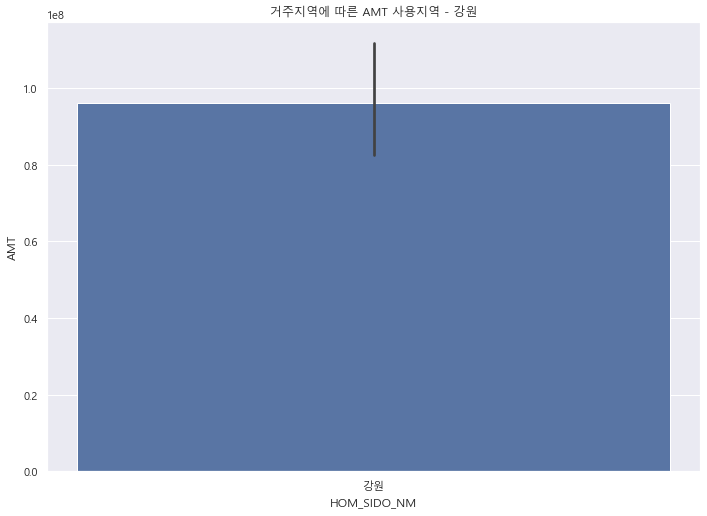

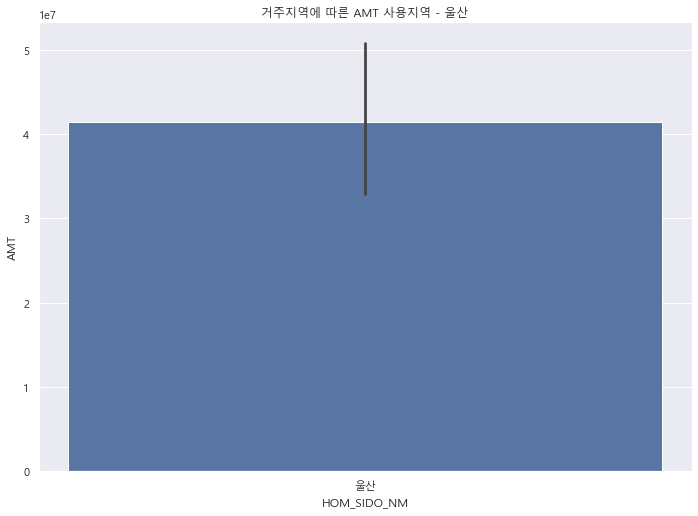

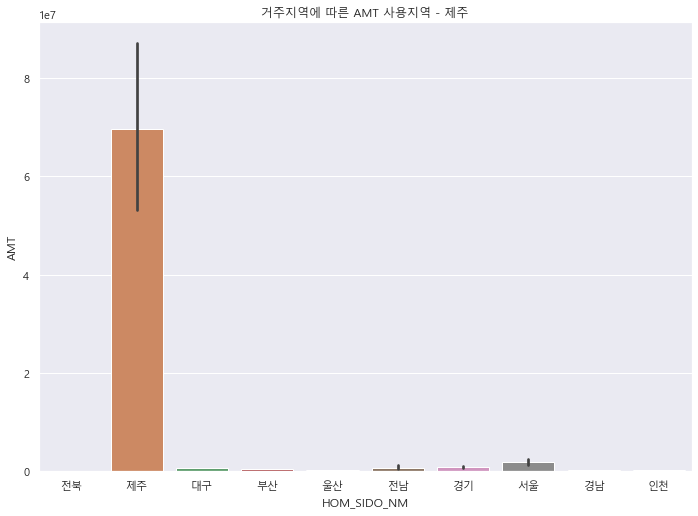

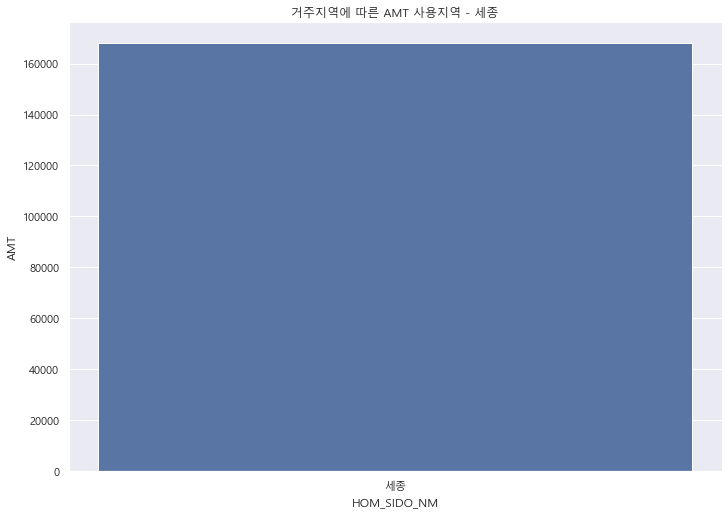

In [17]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']

for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()

# 2019, 2020년 1,2,3 월 AMT비교

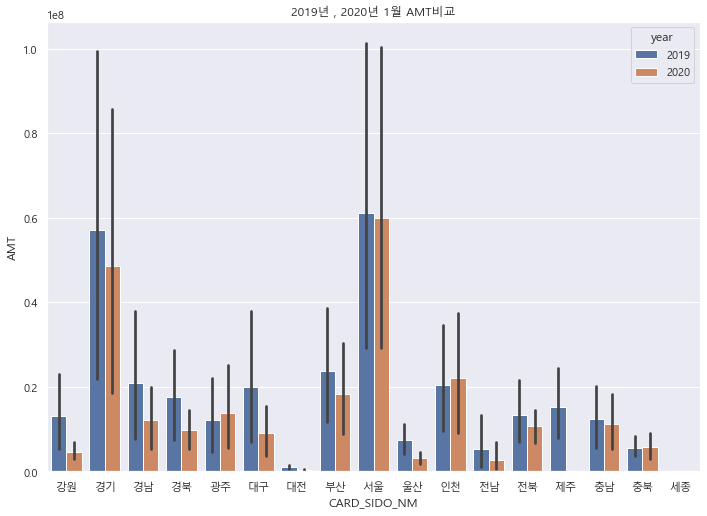

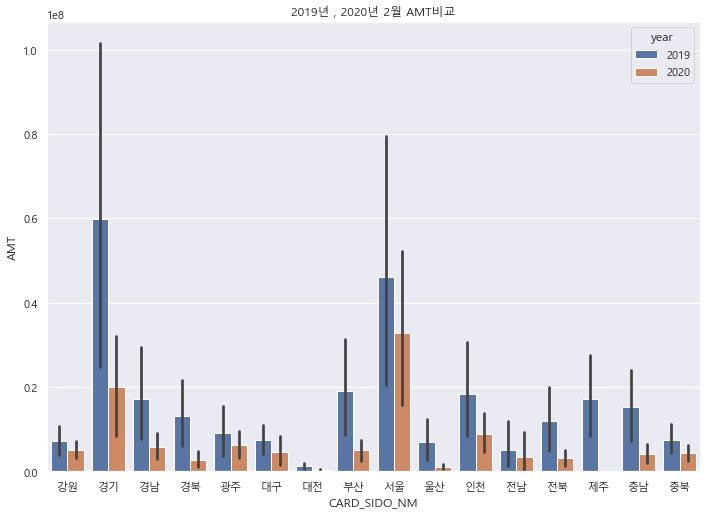

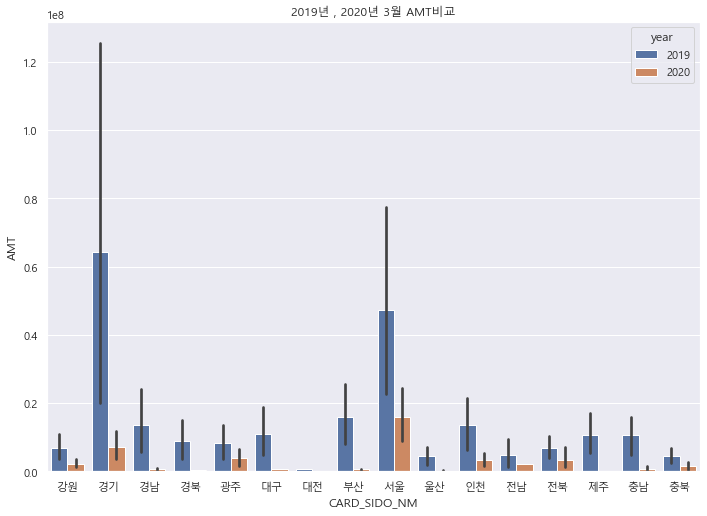

In [13]:
for i in range(1, 4):
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

# CNT , AMT 산포도

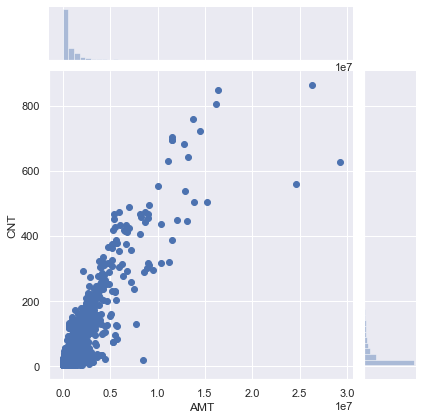

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot(x="AMT", y="CNT", data=df[df.year == 2019])
plt.show()

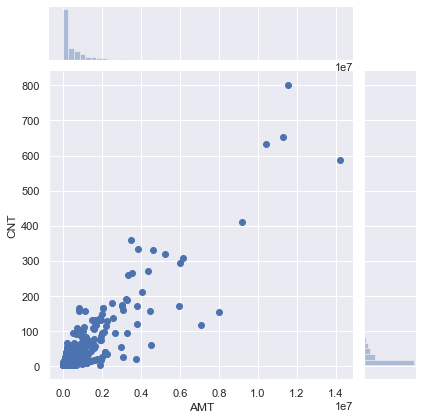

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot(x="AMT", y="CNT", data=df[df.year == 2020])
# plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

# 상관계수

CNT  CSTMR_CNT       AMT
CNT        1.000000   0.978941  0.896436
CSTMR_CNT  0.978941   1.000000  0.889269
AMT        0.896436   0.889269  1.000000


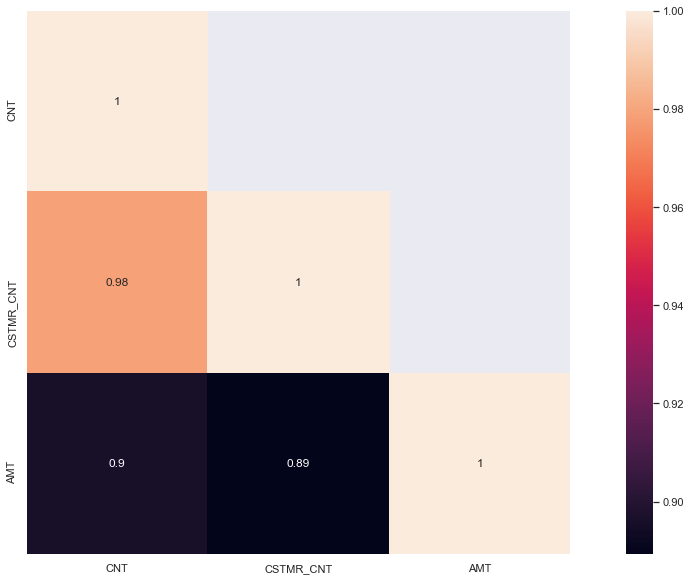

In [16]:
corrMatt = df[['CNT','CSTMR_CNT', 'AMT']]
corr = corrMatt.corr()
print(corr)

mask = np.array(corr) #배열로 바꿔주기
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr, mask = mask, square = True, annot = True)